/kaggle/input/star-dataset/6 class csv.csv
The most common star type is 2.5 which are main sequence stars.
This dataset shows the relationship between the color and temperature of big stars


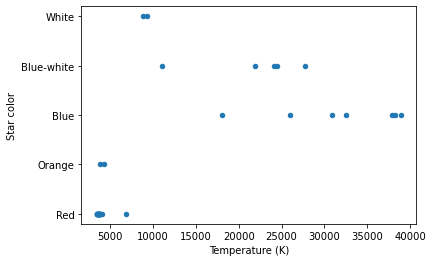

As we can see, stars with lower temperatures are of hotter colors and stars with higher temperatures are of cooler colors

This dataset depics the relationship between luminosity and the type of star


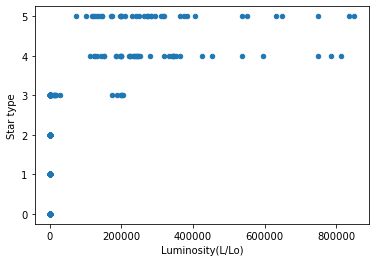

Here we can see a correlation with how how bright the star is and the type of star.

This is a Hertzsprung-Russell Diagram.


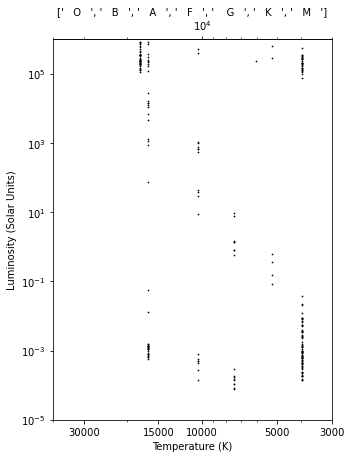

This machine learning model has 95.45 percent accuracy.
It will now predict each star type for each row:
 [[0.51114781]
 [0.44999005]
 [0.18243555]
 [0.44362416]
 [0.00918417]
 [0.40155346]
 [0.37099032]
 [0.34804031]
 [0.3416796 ]
 [0.52003991]
 [1.20309691]
 [1.06288196]
 [0.88187261]
 [1.2297751 ]
 [1.06375183]
 [0.89973519]
 [0.68057177]
 [1.1890586 ]
 [0.84110787]
 [1.14057472]
 [1.74428594]
 [1.68011389]
 [1.61405157]
 [1.61896464]
 [1.57740701]
 [1.86883322]
 [1.65718181]
 [1.58347883]
 [1.82297313]
 [1.63316152]
 [3.63904656]
 [3.63738577]
 [3.34783917]
 [3.07353994]
 [2.78406489]
 [3.15898372]
 [3.12051684]
 [3.0541849 ]
 [2.85935604]
 [2.78666961]
 [3.50297356]
 [3.44299509]
 [3.41977962]
 [3.53756377]
 [3.40571478]
 [3.49338919]
 [3.48353309]
 [3.33193537]
 [3.51637685]
 [3.93351273]
 [4.781783  ]
 [4.39476367]
 [4.54369411]
 [4.75170122]
 [4.46148597]
 [4.97152432]
 [5.21978601]
 [4.85117658]
 [4.6457143 ]
 [5.03157348]
 [0.49706334]
 [0.40669968]
 [0.5149215 ]
 [0.40408977

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from sklearn.linear_model import LinearRegression
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

temp = '/kaggle/input/star-dataset/6 class csv.csv'
thestars = pd.read_csv(temp)
print("The most common star type is "+str(thestars["Star type"].mean())+" which are main sequence stars.")

print("This dataset shows the relationship between the color and temperature of big stars")
thestars.drop(thestars[thestars['Radius(R/Ro)'] > 2000].index, inplace = True)
thestars.drop(thestars[thestars['Radius(R/Ro)'] < 1000].index, inplace = True)
thestars.plot(kind = 'scatter', x = "Temperature (K)", y = "Star color")
plt.show()
print("As we can see, stars with lower temperatures are of hotter colors and stars with higher temperatures are of cooler colors\n")

print("This dataset depics the relationship between luminosity and the type of star")
newstars = pd.read_csv(temp)
newstars.plot(kind = 'scatter', x = "Luminosity(L/Lo)", y = "Star type")
plt.show()
print("Here we can see a correlation with how how bright the star is and the type of star.\n")
print("This is a Hertzsprung-Russell Diagram.")
newstars.loc[newstars["Spectral Class"] == "M", "Spectral Class"] = 1.4
newstars.loc[newstars["Spectral Class"] == "K", "Spectral Class"] = .81
newstars.loc[newstars["Spectral Class"] == "G", "Spectral Class"] = .58
newstars.loc[newstars["Spectral Class"] == "F", "Spectral Class"] = .3
newstars.loc[newstars["Spectral Class"] == "A", "Spectral Class"] = -.02
newstars.loc[newstars["Spectral Class"] == "B", "Spectral Class"] = -.3
newstars.loc[newstars["Spectral Class"] == "O", "Spectral Class"] = -.33

newstars["Temperature (K)"] = ( 1/(newstars["Spectral Class"]*.92 + 0.62) + 1/(.92*newstars["Spectral Class"] + 1.7)) * 4600


starclass = ["   O   ", "   B   ", "   A   ", "   F   ", "    G   ", "   K   ", "   M   "]
width = 500
height = 700
dots = 100
fig, graph = plt.subplots(figsize = (width/dots, height/dots))

graph.scatter(newstars["Temperature (K)"], newstars["Luminosity(L/Lo)"], s = 0.5, c="k")
graph.set_yscale("log")
graph.set_xscale("log")
graph.set_xlim(40000, 3000)
graph.set_ylim(1.e-5, 1.e6)
graph.set_xticks([30000, 15000, 10000, 5000, 3000])
graph.set_ylabel("Luminosity (Solar Units)")
graph.set_xlabel("Temperature (K)")
graph.get_xaxis().set_major_formatter(ScalarFormatter())
top = graph.secondary_xaxis('top')
top.set_xlabel(starclass)
plt.show()



stararray = newstars[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Spectral Class"]].to_numpy()
typearray = newstars[["Star type"]].to_numpy()
starcolor = newstars[["Star color"]].to_numpy()

stararray,typearray = np.array(stararray), np.array(typearray)

reg_model = LinearRegression().fit(stararray, typearray)

result = reg_model.score(stararray, typearray)
print("This machine learning model has "+str(round(result*100, 2))+" percent accuracy.")

prediction = reg_model.predict(stararray)
print("It will now predict each star type for each row:\n "+str(prediction)+"\n")

sunseeker = pd.read_csv(temp)
newstararray = sunseeker["Temperature (K)"]

itr = 0
winningindex = 0
winner = 1000
for i in prediction:    
    if i>=2.5 and i<3.5:
        
        runningcolor = str(starcolor[itr])    
        if runningcolor[2] == "y" or runningcolor[2] == "Y":           
            runningluminocity= abs(stararray[itr, [1]]-1)
            runningtemp = abs(newstararray[itr] - 6000)
            runningradius = abs(stararray[itr, [2]] - 1)
            runningabsmagnitude = abs(stararray[itr, [3]] + 26.74)
            runningsun = runningabsmagnitude + runningluminocity + runningradius + runningtemp
            if winner > runningsun:
                runningsun = winner
                winningindex = itr
            
    itr +=1
    
print("The row that most closley resembles our sun is this one:\n")
print(sunseeker.iloc[winningindex,:])